# Social Media Mining: Network Analysis
### Vincent Malic - Spring 2018

# Module 7.2 NetworkX


## Create Graph object 
* Import module and assign graph object to alias G

In [1]:
import networkx as nx

G = nx.Graph()
G

## Populate Graph with Nodes and Edges
* Identify objects of interest
* Depict relationships between them
* Add multiple nodes at same time by passing list of items

In [2]:
# add single node
G.add_node("Jacie")

In [3]:
# add list of nodes
G.add_nodes_from(["John", "Juan", "Jack", "Julia", "Jade", "Jeff"])

### Define edges between nodes
* Set of relatoinships between nodes in graph
* Indicate start and end points for the connection
* Add multiple edges at same time by adding list of tuples (pairs)

In [4]:
G.add_edge("Jacie", "John")

In [5]:
G.add_edges_from([("Jacie", "Juan"), ("John", "Juan"), ("Juan", "Julia"), ("Juan", "Jade"), ("Jack", "Julia"), ("Julia", "Jeff"), ("Jade", "Jeff")])

## Examine Graph Properties
* Number of nodes and edges
* Get a list of nodes, or list of edges
* Identify neighbors of nodes in the network

In [6]:
G.number_of_nodes()

7

In [7]:
G.number_of_edges()

8

In [8]:
G.nodes()

['Jacie', 'John', 'Juan', 'Jack', 'Julia', 'Jade', 'Jeff']

In [9]:
G.edges()

[('Jacie', 'John'),
 ('Jacie', 'Juan'),
 ('John', 'Juan'),
 ('Juan', 'Julia'),
 ('Juan', 'Jade'),
 ('Jack', 'Julia'),
 ('Julia', 'Jeff'),
 ('Jade', 'Jeff')]

In [10]:
G.neighbors("Juan")

['Jacie', 'John', 'Julia', 'Jade']

## Store Graph Attributes (nodes, edges) 
* Useful for comparing attributes of different graphs
* Tracking changes in single graph over time
* Multiple graphs could have different attribute values

In [11]:
G.graph['week_number'] = 1
G.graph

{'week_number': 1}

In [12]:
G.graph['graph_id'] = 12345
G.graph['manager'] = "Willard"
G.graph

{'graph_id': 12345, 'manager': 'Willard', 'week_number': 1}

## Attributes for Individual nodes
* Identify node, label attribute, and assign attribute value
* Dictionary contains attributes: `Juan` has `age` equal to `29`

In [13]:
G.node["Juan"]["age"] = 29
G.node["Juan"]

{'age': 29}

### Add several nodes to graph with same attributes
* Indicate list of nodes to be added,
* Add attribute and value to be assinged to all new nodes: course=`Z639`

In [14]:
G.add_nodes_from(["Herakles", "Rut", "Teodosio", "Priscila", "Kornelia"], course="Z639")

In [15]:
G.node['Herakles']['course']

'Z639'

In [16]:
G.node['Teodosio']['course']

'Z639'

### Edges can have Attributes of particular values
* Start with graph object, indicate edge start point and end points
* Assign edge weight as an attribute
* Assign weights for multiple edges as a list, indicating weight as attribute

In [17]:
G.edge["Jacie"]["John"]['weight'] = 2.5
G.edge["Jacie"]["John"]

{'weight': 2.5}

In [18]:
G.add_edges_from([("Teodosio", "Herakles"), ("Teodosio", "Kornelia")], weight=5.0)

In [19]:
G.edge['Kornelia']['Teodosio']['weight']

5.0

# Adding attributes to nodes not in graph
* We add an edge for two new nodes (not included)
* NetworkX will add newly created nodes to the graph

In [20]:
G.add_edge("Larry", "Mary")

In [21]:
G.nodes()

['Jacie',
 'John',
 'Juan',
 'Jack',
 'Julia',
 'Jade',
 'Jeff',
 'Herakles',
 'Rut',
 'Teodosio',
 'Priscila',
 'Kornelia',
 'Larry',
 'Mary']

In [22]:
G.edges()

[('Jacie', 'John'),
 ('Jacie', 'Juan'),
 ('John', 'Juan'),
 ('Juan', 'Julia'),
 ('Juan', 'Jade'),
 ('Jack', 'Julia'),
 ('Julia', 'Jeff'),
 ('Jade', 'Jeff'),
 ('Herakles', 'Teodosio'),
 ('Teodosio', 'Kornelia'),
 ('Larry', 'Mary')]

## Undirected vs. Directed Graphs
* Undirected graph has bidirectional edges between nodes A-->B, B-->A
* Directed graph has directional edge between nodes: A-->B, B-->C
* Create directed graph by indicating direction of connections

In [23]:
G.edge["Mary"]["Larry"]['weight'] = 5.0
G.edge["Larry"]["Mary"]

{'weight': 5.0}

In [24]:
# Networkx has method called DiGraph for directed graphs
DG = nx.DiGraph()

DG.add_nodes_from(G.nodes())
DG.nodes()

['Jacie',
 'John',
 'Juan',
 'Jack',
 'Julia',
 'Jade',
 'Jeff',
 'Herakles',
 'Rut',
 'Teodosio',
 'Priscila',
 'Kornelia',
 'Larry',
 'Mary']

## Links in Directed graphs are not reciprocal
* If we add edge from Julia to Kornelia, Kornelia is neighbor of Julia
* BUT, Kornelia is not a neighbor of Julia; Neighbors not applicable to DG
* Use `predecessors` function to identify linked nodes in DG: 

In [25]:
DG.add_edge("Julia", "Kornelia")
DG.neighbors("Julia")

['Kornelia']

In [26]:
DG.neighbors("Kornelia")

[]

In [27]:
DG.predecessors("Kornelia")

['Julia']

### Twitter Example of DG is follower network (and `retweets`)
* Julia can follow Kornelia, but Kornelia does not follow Julia
* Kornelia can follow Julia, but Julia does not follow Kornelia 

## Add attribute to directional edge
* Attribute added to edge from Kornelia to Julia is NOT reciprocal
* In bigraph, we have two separate edges pointing in opposite direction 
* Modifying attributes of one does not modify attributes of the other.

In [28]:
DG.add_edge("Kornelia", "Julia")
DG.edge["Julia"]["Kornelia"]['weight'] = 5.0

In [29]:
DG.edge["Julia"]["Kornelia"]

{'weight': 5.0}

In [30]:
DG.edge["Kornelia"]["Julia"]

{}

# EXAMPLE: Build Network from Twitter data
`Ego network` is seeded with a single individual on which network is grown. 
* Start from `vqmalic` account, get all accounts who follow Vincent.
* Create empty list, add tuple for each relationship in form: (follower's screen name, "vqmalic").

## Get **all my follower's followers**
* Add those relationships to the edge list.
* Breadth-first search will grow exponentially very fast, particularly if someone who follows me has a huge amount of followers. 
* Instead of using the ``Cursor`` object, use normal API calls which will only get the first 25 followers per user. 

### For a project,  use Cursor method
* Process would take a considerable amount of time. 

In [31]:
API_KEY = ""
API_SECRET = ""

import tweepy
auth = tweepy.AppAuthHandler(API_KEY, API_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

### Iterate over twitter followers, capture, store edges in list
* Initialize empty list to store edges, set seed as starting point for network
* Iterate over followers, capture screen name, append their followers to edges
* Try...except is a way to catch errors due to privacy settings
* Iterate through followers of followers


In [32]:
edges = []

ego = api.get_user("vqmalic")

for follower in ego.followers():
    follower_sn = follower.screen_name
    edges.append((follower_sn, "vqmalic"))
    try:
        for follower2 in follower.followers():
            follower2_sn = follower2.screen_name
            edges.append((follower2_sn, follower_sn))
    except:
        print("Not authorized, skipping.")

Not authorized, skipping.


In [33]:
len(edges)

355

In [34]:
edges[:5]

[('seanshiverick', 'vqmalic'),
 ('Dal_DealFinder', 'seanshiverick'),
 ('expertmodels', 'seanshiverick'),
 ('heytammyy', 'seanshiverick'),
 ('shiversea', 'vqmalic')]

## Returns list of Tuples, as Directed Graph
* Create DG object
* Add edges from list of edges from followers, and followers of
* Examine attributes of directed network, visualize graph in Matplotlib 

In [35]:
DG = nx.DiGraph()
DG.add_edges_from(edges)

In [36]:
DG.number_of_nodes()

344

In [37]:
DG.number_of_edges()

355

//anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
//anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
//anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
//anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


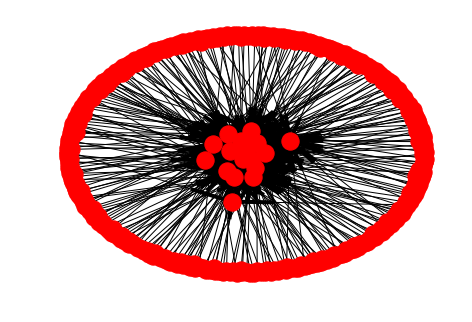

In [38]:
# Create visual of graph in matplotlib (not best for graph visualization)

%matplotlib inline
import matplotlib.pyplot as plt
nx.draw(DG)
plt.show()